<a href="https://colab.research.google.com/github/Arati930/CodeAlpha_AllTasks_DataAnalytics/blob/main/CodeAlpha_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install + Import Libraries

In [4]:
!pip install requests beautifulsoup4 textblob vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


Web Scraping

In [6]:
url = "http://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [7]:
titles = [item.h3.a["title"] for item in soup.find_all("article", class_="product_pod")]
prices = [item.find("p", class_="price_color").text for item in soup.find_all("article", class_="product_pod")]

books_df = pd.DataFrame({"Title": titles, "Price": prices})
print("📚 Scraped Books Data:\n", books_df.head())

📚 Scraped Books Data:
                                    Title    Price
0                   A Light in the Attic  Â£51.77
1                     Tipping the Velvet  Â£53.74
2                             Soumission  Â£50.10
3                          Sharp Objects  Â£47.82
4  Sapiens: A Brief History of Humankind  Â£54.23


In [8]:
books_df.to_csv("scraped_books.csv", index=False)

Exploratory Data Analysis

In [9]:
df = sns.load_dataset("titanic")

In [10]:
print("\nShape of Titanic dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())




Shape of Titanic dataset: (891, 15)

First 5 rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked       

In [11]:
print("\nStatistical Summary:\n", df.describe())
print("\nCorrelation Matrix:\n", df.select_dtypes(include=np.number).corr())


Statistical Summary:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Correlation Matrix:
           survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.3082

Data Visualization

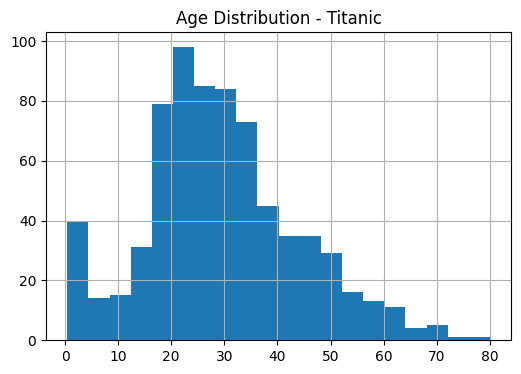

In [12]:
df['age'].dropna().hist(bins=20, figsize=(6,4))
plt.title("Age Distribution - Titanic")
plt.show()

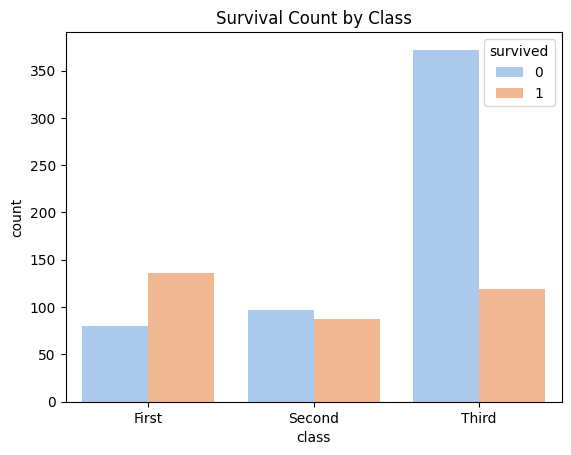

In [13]:
sns.countplot(x="class", hue="survived", data=df, palette="pastel")
plt.title("Survival Count by Class")
plt.show()

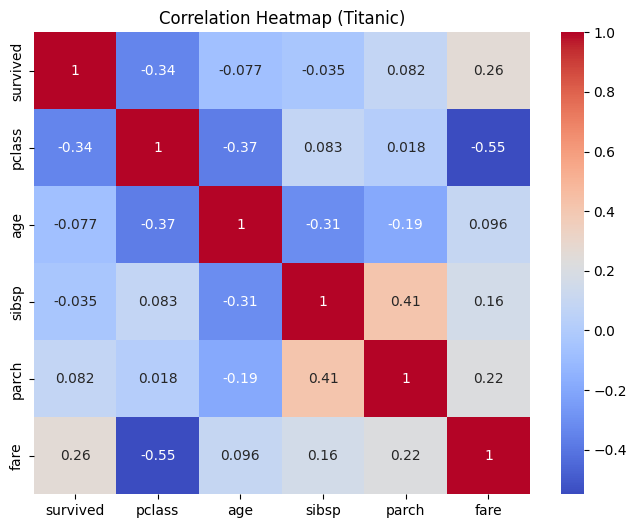

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Titanic)")
plt.show()

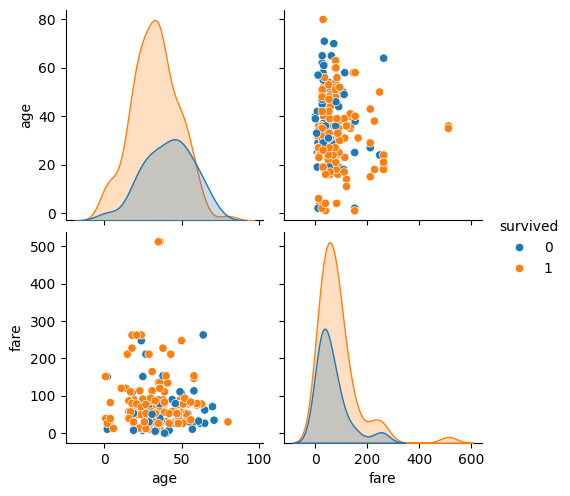

In [15]:
sns.pairplot(df.dropna()[["age", "fare", "survived"]], hue="survived")
plt.show()


Sentiment Analysis

In [30]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [31]:
reviews = pd.DataFrame({
    "review": [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()],
    "label": [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]
})


In [32]:
print("Dataset shape:", reviews.shape)
print(reviews.head())

Dataset shape: (2000, 2)
                                              review label
0  plot : two teen couples go to a church party ,...   neg
1  the happy bastard's quick movie review \ndamn ...   neg
2  it is movies like these that make a jaded movi...   neg
3   " quest for camelot " is warner bros . ' firs...   neg
4  synopsis : a mentally unstable man undergoing ...   neg


In [33]:
analyzer = SentimentIntensityAnalyzer()

In [34]:
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))["compound"]
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

reviews["Predicted_Sentiment"] = reviews["review"].apply(get_sentiment)

In [35]:
print("\nActual vs Predicted Sentiment Counts:")
print(pd.crosstab(reviews["label"], reviews["Predicted_Sentiment"]))



Actual vs Predicted Sentiment Counts:
Predicted_Sentiment  Negative  Positive
label                                  
neg                       435       565
pos                       157       843


/tmp/ipython-input-3402153599.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Predicted_Sentiment", data=reviews, palette="Set2")


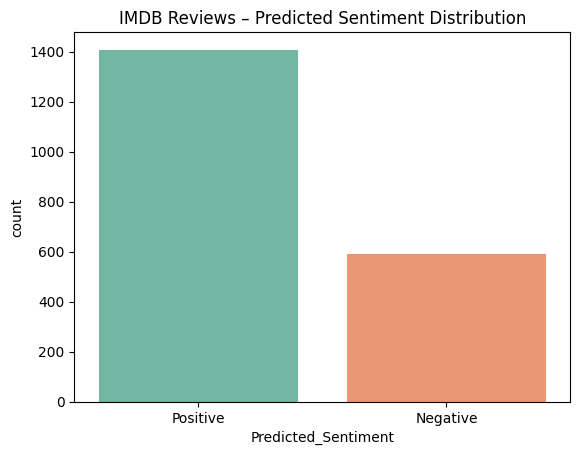

In [36]:
sns.countplot(x="Predicted_Sentiment", data=reviews, palette="Set2")
plt.title("IMDB Reviews – Predicted Sentiment Distribution")
plt.show()